Connected to .venv (Python 3.12.4)

In [ ]:
import os 
from dotenv import load_dotenv
load_dotenv()
API_KEY = os.getenv('API_KEY_cypto')

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [ ]:
url ='https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': API_KEY,
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-31T06:40:31.105Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 9895}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11793, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',None)
df= pd.json_normalize(data['data'])
df['time_stamp']= pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11793,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977563e+07,1.977563e+07,False,NaN,1,NaN,NaN,None,2024-10-31T06:39:00.000Z,72225.704776,3.833018e+10,-28.0965,-0.081797,-0.290287,7.272653,12.961036,24.199263,12.598668,1.428309e+12,58.9600,1.516740e+12,None,2024-10-31T06:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-31 07:40:39.993194
1,1027,Ethereum,ETH,ethereum,9469,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204076e+08,1.204076e+08,True,NaN,2,NaN,NaN,None,2024-10-31T06:39:00.000Z,2642.501094,2.107470e+10,1.0929,-0.136876,-0.810794,3.424533,-0.084380,6.912763,-15.932629,3.181771e+11,13.1342,3.181771e+11,None,2024-10-31T06:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-31 07:40:39.993194
2,825,Tether USDt,USDT,tether,102015,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.205735e+11,1.223379e+11,True,NaN,3,NaN,NaN,None,2024-10-31T06:39:00.000Z,0.999683,6.546177e+10,-18.5163,0.008215,-0.006783,0.079665,0.009435,-0.018717,0.037309,1.205353e+11,4.9756,1.222992e+11,None,2024-10-31T06:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-31 07:40:39.993194
3,1839,BNB,BNB,bnb,2273,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459309e+08,1.459309e+08,False,NaN,4,NaN,NaN,None,2024-10-31T06:39:00.000Z,589.242241,1.634967e+09,-10.0631,-0.371591,-2.346082,-0.602313,1.317014,13.647664,3.979282,8.598865e+10,3.5496,8.598865e+10,None,2024-10-31T06:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-31 07:40:39.993194
4,5426,Solana,SOL,solana,776,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.703948e+08,5.875323e+08,True,NaN,5,NaN,NaN,None,2024-10-31T06:39:00.000Z,174.447637,2.651407e+09,-20.9592,-0.547881,-2.722193,0.586933,11.537112,31.897570,8.489145,8.205927e+10,3.3879,1.024936e+11,None,2024-10-31T06:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-31 07:40:39.993194
5,3408,USDC,USDC,usd-coin,22760,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.507981e+10,3.507981e+10,False,NaN,6,NaN,NaN,None,2024-10-31T06:39:00.000Z,0.999917,7.094135e+09,-20.0600,0.001711,-0.012952,0.005034,0.001092,0.001485,-0.004787,3.507691e+10,1.4482,3.507691e+10,None,2024-10-31T06:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-31 07:40:39.993194
6,52,XRP,XRP,xrp,1413,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.681186e+10,9.998707e+10,False,NaN,7,NaN,NaN,None,2024-10-31T06:39:00.000Z,0.519151,8.491330e+08,-17.7111,-0.206299,-1.265152,-2.154862,-16.398430,-6.775948,-7.727046,2.949394e+10,1.2177,5.191511e+10,None,2024-10-31T06:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-31 07:40:39.993194
7,74,Dogecoin,DOGE,dogecoin,1090,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.465926e+11,1.465926e+11,True,NaN,8,NaN,NaN,None,2024-10-31T06:39:00.000Z,0.170845,2.056408e+09,-37.5474,-1.013906,-2.192225,22.261118,44.225922,72.238530,48.105218,2.504463e+10,1.0337,2.504463e+10,None,2024-10-31T06:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-31 07:40:39.993194
8,1958,TRON,TRX,tron,1059,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.646756e

In [ ]:
def api_runner():
  global df
  url ='https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': API_KEY,
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
  
  pd.set_option('display.max_columns',None)
  df= pd.json_normalize(data['data'])
  df['time_stamp']=pd.to_datetime('now')
  df
  
  if not os.path.isfile(r'C:\Users\tinka\Desktop\learning\Sheets\crypto API.csv'):
    df.to_csv(r'C:\Users\tinka\Desktop\learning\Sheets\crypto API.csv',header='column_names')
  else:
    df.to_csv(r'C:\Users\tinka\Desktop\learning\Sheets\crypto API.csv',mode='a',header=False)

In [ ]:
from time import time
from time import sleep

for i in range (333):
  api_runner()
  print('api runner completed')
  sleep(60)
exit()

api runner completed
api runner completed


KeyboardInterrupt: 

In [ ]:
df= pd.read_csv(r'C:\Users\tinka\Desktop\learning\Sheets\crypto API.csv')
pd.set_option('display.float_format',lambda x:'%.5f' %x)
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,0,1,Bitcoin,BTC,bitcoin,11793,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19775359.00000,19775359.00000,False,NaN,1,NaN,NaN,NaN,2024-10-30T18:52:00.000Z,71897.13468,44467642709.30293,-21.71370,0.13125,-1.60102,9.19067,13.49857,22.00748,14.38583,1421791649369.24170,58.61330,1509839828280.94995,NaN,2024-10-30T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 19:53:34.460232
1,1,1027,Ethereum,ETH,ethereum,9468,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120406284.16332,120406284.16332,True,NaN,2,NaN,NaN,NaN,2024-10-30T18:52:00.000Z,2666.23443,22768547496.20051,-0.98830,-0.25685,0.19997,7.29380,3.04563,6.65958,-13.64940,321031380420.25439,13.23450,321031380420.25000,NaN,2024-10-30T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 19:53:34.460232
2,2,825,Tether USDt,USDT,tether,101999,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,120504138281.46748,122337925861.43820,True,NaN,3,NaN,NaN,NaN,2024-10-30T18:52:00.000Z,0.99966,73751554469.46933,-15.83750,-0.00949,-0.01858,0.10295,-0.00291,-0.05456,0.06212,120462875943.22508,4.96890,122296035608.13000,NaN,2024-10-30T18:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-30 19:53:34.460232
3,3,1839,BNB,BNB,bnb,2273,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145930929.81203,145930929.81203,False,NaN,4,NaN,NaN,NaN,2024-10-30T18:52:00.000Z,599.01335,1738197616.34995,-7.54840,0.20873,-1.47492,3.79899,4.88322,12.34542,8.08649,87414575404.81688,3.60570,87414575404.82001,NaN,2024-10-30T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 19:53:34.460232
4,4,5426,Solana,SOL,solana,776,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,470378194.51494,587536675.22982,True,NaN,5,NaN,NaN,NaN,2024-10-30T18:52:00.000Z,174.25912,3003650409.13926,-26.39240,-0.43719,-4.04862,2.96805,12.40492,28.46532,9.50598,81967689134.46696,3.37550,102383622608.17999,NaN,2024-10-30T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 19:53:34.460232
5,5,3408,USDC,USDC,usd-coin,22753,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,34831970071.53516,34831970071.53516,False,NaN,6,NaN,NaN,NaN,2024-10-30T18:52:00.000Z,0.99989,8058852976.72553,-15.22640,0.00258,-0.00389,-0.00105,-0.00268,-0.02573,0.00491,34828297343.28995,1.43430,34828297343.29000,NaN,2024-10-30T18:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-30 19:53:34.460232
6,6,52,XRP,XRP,xrp,1413,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56811862950.00000,99987068281.00000,False,NaN,7,NaN,NaN,NaN,2024-10-30T18:52:00.000Z,0.52296,975175054.87791,-7.36860,0.02652,-1.31606,1.33506,-15.71605,-7.68215,-8.91042,29710291460.72533,1.22350,52295928909.91000,NaN,2024-10-30T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 19:53:34.460232
7,7,74,Dogecoin,DOGE,dogecoin,1090,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146585706383.70529,146585706383.70529,True,NaN,8,NaN,NaN,NaN,2024-10-30T18:52:00.000Z,0.16778,2734340767.36045,-33.84130,0.56000,-4.38944,23.50107,42.19518,64.73847,47.98481,24594546611.79321,1.01390,24594546611.79000,NaN,2024-10-30T18:52:

In [ ]:
df.groupby('name',sort=False)[['quote.USD.percent_change_1h', 
                               'quote.USD.percent_change_24h',	
                               'quote.USD.percent_change_7d',	
                               'quote.USD.percent_change_30d',
                               'quote.USD.percent_change_60d',	
                               'quote.USD.percent_change_90d'
                               ]].mean()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.03255,-0.92765,8.21825,13.25121,23.12265,13.52197
Ethereum,-0.18925,-0.28964,5.35921,1.50524,6.81746,-14.76651
Tether USDt,0.00274,-0.00278,0.09532,0.00334,-0.03600,0.05507
BNB,-0.08216,-1.91717,1.59007,3.11047,12.99057,5.97359
Solana,-0.47930,-3.37959,1.77765,11.96468,30.17916,8.93344
USDC,0.00310,0.00077,0.01081,0.00309,-0.01264,0.00245
XRP,-0.09737,-1.28924,-0.41409,-16.06520,-7.24028,-8.31116
Dogecoin,-0.22012,-3.29110,22.92035,43.21668,68.50993,48.00603
TRON,0.00848,1.63634,4.93151,8.13353,7.76135,32.64750


In [ ]:
df2

NameError: name 'df2' is not defined

In [ ]:
df2= df.groupby('name',sort=False)[['quote.USD.percent_change_1h', 
                               'quote.USD.percent_change_24h',	
                               'quote.USD.percent_change_7d',	
                               'quote.USD.percent_change_30d',
                               'quote.USD.percent_change_60d',	
                               'quote.USD.percent_change_90d'
                               ]].mean()

In [ ]:
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.03255,-0.92765,8.21825,13.25121,23.12265,13.52197
Ethereum,-0.18925,-0.28964,5.35921,1.50524,6.81746,-14.76651
Tether USDt,0.00274,-0.00278,0.09532,0.00334,-0.03600,0.05507
BNB,-0.08216,-1.91717,1.59007,3.11047,12.99057,5.97359
Solana,-0.47930,-3.37959,1.77765,11.96468,30.17916,8.93344
USDC,0.00310,0.00077,0.01081,0.00309,-0.01264,0.00245
XRP,-0.09737,-1.28924,-0.41409,-16.06520,-7.24028,-8.31116
Dogecoin,-0.22012,-3.29110,22.92035,43.21668,68.50993,48.00603
TRON,0.00848,1.63634,4.93151,8.13353,7.76135,32.64750


In [ ]:
df3=df2.transpose

In [ ]:
df3

<bound method DataFrame.transpose of               quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                      
Bitcoin                           0.03255                      -0.92765   
Ethereum                         -0.18925                      -0.28964   
Tether USDt                       0.00274                      -0.00278   
BNB                              -0.08216                      -1.91717   
Solana                           -0.47930                      -3.37959   
USDC                              0.00310                       0.00077   
XRP                              -0.09737                      -1.28924   
Dogecoin                         -0.22012                      -3.29110   
TRON                              0.00848                       1.63634   
Toncoin                          -0.08047                      -2.44419   
Cardano                          -0.05469                      

In [ ]:
df3=df2.stack()

In [ ]:
df3

name                                      
Bitcoin       quote.USD.percent_change_1h     0.03255
              quote.USD.percent_change_24h   -0.92765
              quote.USD.percent_change_7d     8.21825
              quote.USD.percent_change_30d   13.25121
              quote.USD.percent_change_60d   23.12265
                                               ...   
Bitcoin Cash  quote.USD.percent_change_24h   -2.83923
              quote.USD.percent_change_7d     6.67432
              quote.USD.percent_change_30d    8.33672
              quote.USD.percent_change_60d   16.11386
              quote.USD.percent_change_90d   -5.68877
Length: 90, dtype: float64

In [ ]:
type(df3)

pandas.core.series.Series

In [ ]:
df4= df3.to_frame()
df4

0
name                                              
Bitcoin      quote.USD.percent_change_1h   0.03255
             quote.USD.percent_change_24h -0.92765
             quote.USD.percent_change_7d   8.21825
             quote.USD.percent_change_30d 13.25121
             quote.USD.percent_change_60d 23.12265
...                                            ...
Bitcoin Cash quote.USD.percent_change_24h -2.83923
             quote.USD.percent_change_7d   6.67432
             quote.USD.percent_change_30d  8.33672
             quote.USD.percent_change_60d 16.11386
             quote.USD.percent_change_90d -5.68877

[90 rows x 1 columns]

In [ ]:
df4= df3.to_frame(name='values')
df4

values
name                                              
Bitcoin      quote.USD.percent_change_1h   0.03255
             quote.USD.percent_change_24h -0.92765
             quote.USD.percent_change_7d   8.21825
             quote.USD.percent_change_30d 13.25121
             quote.USD.percent_change_60d 23.12265
...                                            ...
Bitcoin Cash quote.USD.percent_change_24h -2.83923
             quote.USD.percent_change_7d   6.67432
             quote.USD.percent_change_30d  8.33672
             quote.USD.percent_change_60d 16.11386
             quote.USD.percent_change_90d -5.68877

[90 rows x 1 columns]

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
df4

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.03255
             quote.USD.percent_change_24h  -0.92765
             quote.USD.percent_change_7d    8.21825
             quote.USD.percent_change_30d  13.25121
             quote.USD.percent_change_60d  23.12265
             quote.USD.percent_change_90d  13.52197
Ethereum     quote.USD.percent_change_1h   -0.18925
             quote.USD.percent_change_24h  -0.28964
             quote.USD.percent_change_7d    5.35921
             quote.USD.percent_change_30d   1.50524
             quote.USD.percent_change_60d   6.81746
             quote.USD.percent_change_90d -14.76651
Tether USDt  quote.USD.percent_change_1h    0.00274
             quote.USD.percent_change_24h  -0.00278
             quote.USD.percent_change_7d    0.09532
             quote.USD.percent_change_30d   0.00334
             quote.USD.percent_change_60d  -0.03600
             quote.USD.percent_change_90d   0.05507
BNB          quote.USD.percent_change_1h   -0.08216
             quote.USD.percent_change_24h  -1.91717
             quote.USD.percent_change_7d    1.59007
             quote.USD.percent_change_30d   3.11047
             quote.USD.percent_change_60d  12.99057
             quote.USD.percent_change_90d   5.97359
Solana       quote.USD.percent_change_1h   -0.47930
             quote.USD.percent_change_24h  -3.37959
             quote.USD.percent_change_7d    1.77765
             quote.USD.percent_change_30d  11.96468
             quote.USD.percent_change_60d  30.17916
             quote.USD.percent_change_90d   8.93344
USDC         quote.USD.percent_change_1h    0.00310
             quote.USD.percent_change_24h   0.00077
             quote.USD.percent_change_7d    0.01081
             quote.USD.percent_change_30d   0.00309
             quote.USD.percent_change_60d  -0.01264
             quote.USD.percent_change_90d   0.00245
XRP          quote.USD.percent_change_1h   -0.09737
             quote.USD.percent_change_24h  -1.28924
             quote.USD.percent_change_7d   -0.41409
             quote.USD.percent_change_30d -16.06520
             quote.USD.percent_change_60d  -7.24028
             quote.USD.percent_change_90d  -8.31116
Dogecoin     quote.USD.percent_change_1h   -0.22012
             quote.USD.percent_change_24h  -3.29110
             quote.USD.percent_change_7d   22.92035
             quote.USD.percent_change_30d  43.21668
             quote.USD.percent_change_60d  68.50993
             quote.USD.percent_change_90d  48.00603
TRON         quote.USD.percent_change_1h    0.00848
             quote.USD.percent_change_24h   1.63634
             quote.USD.percent_change_7d    4.93151
             quote.USD.percent_change_30d   8.13353
             quote.USD.percent_change_60d   7.76135
             quote.USD.percent_change_90d  32.64750
Toncoin      quote.USD.percent_change_1h   -0.08047
             quote.USD.percent_change_24h  -2.44419
             quote.USD.percent_change_7d   -2.79736
             quote.USD.percent_change_30d -14.69946
             quote.USD.percent_change_60d  -7.82086
             quote.USD.percent_change_90d -24.81733
Cardano      quote.USD.percent_change_1h   -0.05469
             quote.USD.percent_change_24h  -0.29425
             quote.USD.percent_change_7d    1.96397
             quote.USD.percent_change_30d  -6.78009
             quote.USD.percent_change_60d   3.30913
             quote.USD.percent_change_90d  -4.90811
Shiba Inu    quote.USD.percent_change_1h   -0.17704
             quote.USD.percent_change_24h  -3.31256
             quote.USD.percent_change_7d    5.34377
             quote.USD.percent_change_30d   2.02537
             quote.USD.percent_change_60d  35.14782
             quote.USD.percent_change_90d  22.24690
Avalanche    quote.USD.percent_change_1h   -0.19144
             quote.USD.percent_change_24h  -2.97147
             quote.USD.percent_change_7d   -2.32818
             quote.USD.percent_change_30d

In [ ]:
df4.reset_index(inplace=True)

In [ ]:
df4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.03255
1,Bitcoin,quote.USD.percent_change_24h,-0.92765
2,Bitcoin,quote.USD.percent_change_7d,8.21825
3,Bitcoin,quote.USD.percent_change_30d,13.25121
4,Bitcoin,quote.USD.percent_change_60d,23.12265
5,Bitcoin,quote.USD.percent_change_90d,13.52197
6,Ethereum,quote.USD.percent_change_1h,-0.18925
7,Ethereum,quote.USD.percent_change_24h,-0.28964
8,Ethereum,quote.USD.percent_change_7d,5.35921
9,Ethereum,quote.USD.percent_change_30d,1.50524


In [ ]:
df5

NameError: name 'df5' is not defined

In [ ]:
df5= df4.reset_index(inplace=True)

In [ ]:
df5

In [ ]:
df4.transpose

<bound method DataFrame.transpose of     index          name                       level_1    values
0       0       Bitcoin   quote.USD.percent_change_1h   0.03255
1       1       Bitcoin  quote.USD.percent_change_24h  -0.92765
2       2       Bitcoin   quote.USD.percent_change_7d   8.21825
3       3       Bitcoin  quote.USD.percent_change_30d  13.25121
4       4       Bitcoin  quote.USD.percent_change_60d  23.12265
5       5       Bitcoin  quote.USD.percent_change_90d  13.52197
6       6      Ethereum   quote.USD.percent_change_1h  -0.18925
7       7      Ethereum  quote.USD.percent_change_24h  -0.28964
8       8      Ethereum   quote.USD.percent_change_7d   5.35921
9       9      Ethereum  quote.USD.percent_change_30d   1.50524
10     10      Ethereum  quote.USD.percent_change_60d   6.81746
11     11      Ethereum  quote.USD.percent_change_90d -14.76651
12     12   Tether USDt   quote.USD.percent_change_1h   0.00274
13     13   Tether USDt  quote.USD.percent_change_24h  -0.00278
14 

In [ ]:
df2_trasposed()

NameError: name 'df2_trasposed' is not defined

In [ ]:
df2_trasposed('name')

NameError: name 'df2_trasposed' is not defined

In [ ]:
df2_transposed('name',['quote.USD.percent_change_1h', 
                               'quote.USD.percent_change_24h',	
                               'quote.USD.percent_change_7d',	
                               'quote.USD.percent_change_30d',
                               'quote.USD.percent_change_60d',	
                               'quote.USD.percent_change_90d'])

NameError: name 'df2_transposed' is not defined

In [ ]:
df2.transpose()

name,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Dogecoin,TRON,Toncoin,Cardano,Shiba Inu,Avalanche,Chainlink,Bitcoin Cash
quote.USD.percent_change_1h,0.03255,-0.18925,0.00274,-0.08216,-0.47930,0.00310,-0.09737,-0.22012,0.00848,-0.08047,-0.05469,-0.17704,-0.19144,-0.01179,0.56103
quote.USD.percent_change_24h,-0.92765,-0.28964,-0.00278,-1.91717,-3.37959,0.00077,-1.28924,-3.29110,1.63634,-2.44419,-0.29425,-3.31256,-2.97147,3.23178,-2.83923
quote.USD.percent_change_7d,8.21825,5.35921,0.09532,1.59007,1.77765,0.01081,-0.41409,22.92035,4.93151,-2.79736,1.96397,5.34377,-2.32818,8.64049,6.67432
quote.USD.percent_change_30d,13.25121,1.50524,0.00334,3.11047,11.96468,0.00309,-16.06520,43.21668,8.13353,-14.69946,-6.78009,2.02537,-8.24165,1.20351,8.33672
quote.USD.percent_change_60d,23.12265,6.81746,-0.03600,12.99057,30.17916,-0.01264,-7.24028,68.50993,7.76135,-7.82086,3.30913,35.14782,16.47106,11.86540,16.11386
quote.USD.percent_change_90d,13.52197,-14.76651,0.05507,5.97359,8.93344,0.00245,-8.31116,48.00603,32.64750,-24.81733,-4.90811,22.24690,6.32359,-0.94628,-5.68877


In [ ]:
d45= df2.transpose()

In [ ]:
df5

In [ ]:
df5= df2.transpose()

In [ ]:
df5

name,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Dogecoin,TRON,Toncoin,Cardano,Shiba Inu,Avalanche,Chainlink,Bitcoin Cash
quote.USD.percent_change_1h,0.03255,-0.18925,0.00274,-0.08216,-0.47930,0.00310,-0.09737,-0.22012,0.00848,-0.08047,-0.05469,-0.17704,-0.19144,-0.01179,0.56103
quote.USD.percent_change_24h,-0.92765,-0.28964,-0.00278,-1.91717,-3.37959,0.00077,-1.28924,-3.29110,1.63634,-2.44419,-0.29425,-3.31256,-2.97147,3.23178,-2.83923
quote.USD.percent_change_7d,8.21825,5.35921,0.09532,1.59007,1.77765,0.01081,-0.41409,22.92035,4.93151,-2.79736,1.96397,5.34377,-2.32818,8.64049,6.67432
quote.USD.percent_change_30d,13.25121,1.50524,0.00334,3.11047,11.96468,0.00309,-16.06520,43.21668,8.13353,-14.69946,-6.78009,2.02537,-8.24165,1.20351,8.33672
quote.USD.percent_change_60d,23.12265,6.81746,-0.03600,12.99057,30.17916,-0.01264,-7.24028,68.50993,7.76135,-7.82086,3.30913,35.14782,16.47106,11.86540,16.11386
quote.USD.percent_change_90d,13.52197,-14.76651,0.05507,5.97359,8.93344,0.00245,-8.31116,48.00603,32.64750,-24.81733,-4.90811,22.24690,6.32359,-0.94628,-5.68877


In [ ]:
df4.groupby('name')

In [ ]:
df4

,index,name,level_1,values
0,0,Bitcoin,quote.USD.percent_change_1h,0.03255
1,1,Bitcoin,quote.USD.percent_change_24h,-0.92765
2,2,Bitcoin,quote.USD.percent_change_7d,8.21825
3,3,Bitcoin,quote.USD.percent_change_30d,13.25121
4,4,Bitcoin,quote.USD.percent_change_60d,23.12265
5,5,Bitcoin,quote.USD.percent_change_90d,13.52197
6,6,Ethereum,quote.USD.percent_change_1h,-0.18925
7,7,Ethereum,quote.USD.percent_change_24h,-0.28964
8,8,Ethereum,quote.USD.percent_change_7d,5.35921
9,9,Ethereum,quote.USD.percent_change_30d,1.50524


In [ ]:
df5.reset_index(inplace=True)

In [ ]:
df5

name,index,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Dogecoin,TRON,Toncoin,Cardano,Shiba Inu,Avalanche,Chainlink,Bitcoin Cash
0,quote.USD.percent_change_1h,0.03255,-0.18925,0.00274,-0.08216,-0.47930,0.00310,-0.09737,-0.22012,0.00848,-0.08047,-0.05469,-0.17704,-0.19144,-0.01179,0.56103
1,quote.USD.percent_change_24h,-0.92765,-0.28964,-0.00278,-1.91717,-3.37959,0.00077,-1.28924,-3.29110,1.63634,-2.44419,-0.29425,-3.31256,-2.97147,3.23178,-2.83923
2,quote.USD.percent_change_7d,8.21825,5.35921,0.09532,1.59007,1.77765,0.01081,-0.41409,22.92035,4.93151,-2.79736,1.96397,5.34377,-2.32818,8.64049,6.67432
3,quote.USD.percent_change_30d,13.25121,1.50524,0.00334,3.11047,11.96468,0.00309,-16.06520,43.21668,8.13353,-14.69946,-6.78009,2.02537,-8.24165,1.20351,8.33672
4,quote.USD.percent_change_60d,23.12265,6.81746,-0.03600,12.99057,30.17916,-0.01264,-7.24028,68.50993,7.76135,-7.82086,3.30913,35.14782,16.47106,11.86540,16.11386
5,quote.USD.percent_change_90d,13.52197,-14.76651,0.05507,5.97359,8.93344,0.00245,-8.31116,48.00603,32.64750,-24.81733,-4.90811,22.24690,6.32359,-0.94628,-5.68877


In [ ]:
df6= df5.rename(columns=['name':'', 'index':'percentage_change'])

SyntaxError: invalid syntax (<ipython-input-40-62d20d089f86>, line 1)

In [ ]:
df6= df5.rename(columns=['name':''])

SyntaxError: invalid syntax (<ipython-input-41-b2dac6878641>, line 1)

In [ ]:
df6= df5.rename(columns={'name':' ','index':'percentage_change'})

In [ ]:
df6

name,percentage_change,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Dogecoin,TRON,Toncoin,Cardano,Shiba Inu,Avalanche,Chainlink,Bitcoin Cash
0,quote.USD.percent_change_1h,0.03255,-0.18925,0.00274,-0.08216,-0.47930,0.00310,-0.09737,-0.22012,0.00848,-0.08047,-0.05469,-0.17704,-0.19144,-0.01179,0.56103
1,quote.USD.percent_change_24h,-0.92765,-0.28964,-0.00278,-1.91717,-3.37959,0.00077,-1.28924,-3.29110,1.63634,-2.44419,-0.29425,-3.31256,-2.97147,3.23178,-2.83923
2,quote.USD.percent_change_7d,8.21825,5.35921,0.09532,1.59007,1.77765,0.01081,-0.41409,22.92035,4.93151,-2.79736,1.96397,5.34377,-2.32818,8.64049,6.67432
3,quote.USD.percent_change_30d,13.25121,1.50524,0.00334,3.11047,11.96468,0.00309,-16.06520,43.21668,8.13353,-14.69946,-6.78009,2.02537,-8.24165,1.20351,8.33672
4,quote.USD.percent_change_60d,23.12265,6.81746,-0.03600,12.99057,30.17916,-0.01264,-7.24028,68.50993,7.76135,-7.82086,3.30913,35.14782,16.47106,11.86540,16.11386
5,quote.USD.percent_change_90d,13.52197,-14.76651,0.05507,5.97359,8.93344,0.00245,-8.31116,48.00603,32.64750,-24.81733,-4.90811,22.24690,6.32359,-0.94628,-5.68877


In [ ]:
df6= df5.rename(columns={'name':'','index':'percentage_change'})

In [ ]:
df6

name,percentage_change,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Dogecoin,TRON,Toncoin,Cardano,Shiba Inu,Avalanche,Chainlink,Bitcoin Cash
0,quote.USD.percent_change_1h,0.03255,-0.18925,0.00274,-0.08216,-0.47930,0.00310,-0.09737,-0.22012,0.00848,-0.08047,-0.05469,-0.17704,-0.19144,-0.01179,0.56103
1,quote.USD.percent_change_24h,-0.92765,-0.28964,-0.00278,-1.91717,-3.37959,0.00077,-1.28924,-3.29110,1.63634,-2.44419,-0.29425,-3.31256,-2.97147,3.23178,-2.83923
2,quote.USD.percent_change_7d,8.21825,5.35921,0.09532,1.59007,1.77765,0.01081,-0.41409,22.92035,4.93151,-2.79736,1.96397,5.34377,-2.32818,8.64049,6.67432
3,quote.USD.percent_change_30d,13.25121,1.50524,0.00334,3.11047,11.96468,0.00309,-16.06520,43.21668,8.13353,-14.69946,-6.78009,2.02537,-8.24165,1.20351,8.33672
4,quote.USD.percent_change_60d,23.12265,6.81746,-0.03600,12.99057,30.17916,-0.01264,-7.24028,68.50993,7.76135,-7.82086,3.30913,35.14782,16.47106,11.86540,16.11386
5,quote.USD.percent_change_90d,13.52197,-14.76651,0.05507,5.97359,8.93344,0.00245,-8.31116,48.00603,32.64750,-24.81733,-4.90811,22.24690,6.32359,-0.94628,-5.68877


In [ ]:
df6= df5.rename(columns={'name':'index','index':'percentage_change'})

In [ ]:
df6

name,percentage_change,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Dogecoin,TRON,Toncoin,Cardano,Shiba Inu,Avalanche,Chainlink,Bitcoin Cash
0,quote.USD.percent_change_1h,0.03255,-0.18925,0.00274,-0.08216,-0.47930,0.00310,-0.09737,-0.22012,0.00848,-0.08047,-0.05469,-0.17704,-0.19144,-0.01179,0.56103
1,quote.USD.percent_change_24h,-0.92765,-0.28964,-0.00278,-1.91717,-3.37959,0.00077,-1.28924,-3.29110,1.63634,-2.44419,-0.29425,-3.31256,-2.97147,3.23178,-2.83923
2,quote.USD.percent_change_7d,8.21825,5.35921,0.09532,1.59007,1.77765,0.01081,-0.41409,22.92035,4.93151,-2.79736,1.96397,5.34377,-2.32818,8.64049,6.67432
3,quote.USD.percent_change_30d,13.25121,1.50524,0.00334,3.11047,11.96468,0.00309,-16.06520,43.21668,8.13353,-14.69946,-6.78009,2.02537,-8.24165,1.20351,8.33672
4,quote.USD.percent_change_60d,23.12265,6.81746,-0.03600,12.99057,30.17916,-0.01264,-7.24028,68.50993,7.76135,-7.82086,3.30913,35.14782,16.47106,11.86540,16.11386
5,quote.USD.percent_change_90d,13.52197,-14.76651,0.05507,5.97359,8.93344,0.00245,-8.31116,48.00603,32.64750,-24.81733,-4.90811,22.24690,6.32359,-0.94628,-5.68877


In [ ]:
df6= df5.rename(columns={'index':'percentage_change'},headers={'name':' '})

TypeError: DataFrame.rename() got an unexpected keyword argument 'headers'

In [ ]:
df6= df5.rename(columns={'index':'percentage_change'},headers='name':' ')

SyntaxError: invalid syntax (<ipython-input-49-d81baebd4769>, line 1)

In [ ]:
df2
df3=df2.stack()
df3

type(df3)
df4= df3.to_frame(name='values')
df4

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.03255
             quote.USD.percent_change_24h  -0.92765
             quote.USD.percent_change_7d    8.21825
             quote.USD.percent_change_30d  13.25121
             quote.USD.percent_change_60d  23.12265
             quote.USD.percent_change_90d  13.52197
Ethereum     quote.USD.percent_change_1h   -0.18925
             quote.USD.percent_change_24h  -0.28964
             quote.USD.percent_change_7d    5.35921
             quote.USD.percent_change_30d   1.50524
             quote.USD.percent_change_60d   6.81746
             quote.USD.percent_change_90d -14.76651
Tether USDt  quote.USD.percent_change_1h    0.00274
             quote.USD.percent_change_24h  -0.00278
             quote.USD.percent_change_7d    0.09532
             quote.USD.percent_change_30d   0.00334
             quote.USD.percent_change_60d  -0.03600
             quote.USD.percent_change_90d   0.05507
BNB          quote.USD.percent_change_1h   -0.08216
             quote.USD.percent_change_24h  -1.91717
             quote.USD.percent_change_7d    1.59007
             quote.USD.percent_change_30d   3.11047
             quote.USD.percent_change_60d  12.99057
             quote.USD.percent_change_90d   5.97359
Solana       quote.USD.percent_change_1h   -0.47930
             quote.USD.percent_change_24h  -3.37959
             quote.USD.percent_change_7d    1.77765
             quote.USD.percent_change_30d  11.96468
             quote.USD.percent_change_60d  30.17916
             quote.USD.percent_change_90d   8.93344
USDC         quote.USD.percent_change_1h    0.00310
             quote.USD.percent_change_24h   0.00077
             quote.USD.percent_change_7d    0.01081
             quote.USD.percent_change_30d   0.00309
             quote.USD.percent_change_60d  -0.01264
             quote.USD.percent_change_90d   0.00245
XRP          quote.USD.percent_change_1h   -0.09737
             quote.USD.percent_change_24h  -1.28924
             quote.USD.percent_change_7d   -0.41409
             quote.USD.percent_change_30d -16.06520
             quote.USD.percent_change_60d  -7.24028
             quote.USD.percent_change_90d  -8.31116
Dogecoin     quote.USD.percent_change_1h   -0.22012
             quote.USD.percent_change_24h  -3.29110
             quote.USD.percent_change_7d   22.92035
             quote.USD.percent_change_30d  43.21668
             quote.USD.percent_change_60d  68.50993
             quote.USD.percent_change_90d  48.00603
TRON         quote.USD.percent_change_1h    0.00848
             quote.USD.percent_change_24h   1.63634
             quote.USD.percent_change_7d    4.93151
             quote.USD.percent_change_30d   8.13353
             quote.USD.percent_change_60d   7.76135
             quote.USD.percent_change_90d  32.64750
Toncoin      quote.USD.percent_change_1h   -0.08047
             quote.USD.percent_change_24h  -2.44419
             quote.USD.percent_change_7d   -2.79736
             quote.USD.percent_change_30d -14.69946
             quote.USD.percent_change_60d  -7.82086
             quote.USD.percent_change_90d -24.81733
Cardano      quote.USD.percent_change_1h   -0.05469
             quote.USD.percent_change_24h  -0.29425
             quote.USD.percent_change_7d    1.96397
             quote.USD.percent_change_30d  -6.78009
             quote.USD.percent_change_60d   3.30913
             quote.USD.percent_change_90d  -4.90811
Shiba Inu    quote.USD.percent_change_1h   -0.17704
             quote.USD.percent_change_24h  -3.31256
             quote.USD.percent_change_7d    5.34377
             quote.USD.percent_change_30d   2.02537
             quote.USD.percent_change_60d  35.14782
             quote.USD.percent_change_90d  22.24690
Avalanche    quote.USD.percent_change_1h   -0.19144
             quote.USD.percent_change_24h  -2.97147
             quote.USD.percent_change_7d   -2.32818
             quote.USD.percent_change_30d

In [ ]:
df4.reset_index(inplace=True)

In [ ]:
df4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.03255
1,Bitcoin,quote.USD.percent_change_24h,-0.92765
2,Bitcoin,quote.USD.percent_change_7d,8.21825
3,Bitcoin,quote.USD.percent_change_30d,13.25121
4,Bitcoin,quote.USD.percent_change_60d,23.12265
5,Bitcoin,quote.USD.percent_change_90d,13.52197
6,Ethereum,quote.USD.percent_change_1h,-0.18925
7,Ethereum,quote.USD.percent_change_24h,-0.28964
8,Ethereum,quote.USD.percent_change_7d,5.35921
9,Ethereum,quote.USD.percent_change_30d,1.50524


In [ ]:
import seaborn as sms
import matplotlib.pyplot as plt

In [ ]:
df4.rename(columns={'level_1':'percentage_change'})

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.03255
1,Bitcoin,quote.USD.percent_change_24h,-0.92765
2,Bitcoin,quote.USD.percent_change_7d,8.21825
3,Bitcoin,quote.USD.percent_change_30d,13.25121
4,Bitcoin,quote.USD.percent_change_60d,23.12265
5,Bitcoin,quote.USD.percent_change_90d,13.52197
6,Ethereum,quote.USD.percent_change_1h,-0.18925
7,Ethereum,quote.USD.percent_change_24h,-0.28964
8,Ethereum,quote.USD.percent_change_7d,5.35921
9,Ethereum,quote.USD.percent_change_30d,1.50524


In [ ]:
df4['percentage_change']=df4['percentage_change'].replace(['quote.USD.percent_change_1h', 
                               'quote.USD.percent_change_24h',	
                               'quote.USD.percent_change_7d',	
                               'quote.USD.percent_change_30d',
                               'quote.USD.percent_change_60d',	
                               'quote.USD.percent_change_90d'],
                               ['1h','24h','7d','30d','60d','90d'])

KeyError: 'percentage_change'

In [ ]:
df4['percentage_change']=df4['percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',	'quote.USD.percent_change_7d',	'quote.USD.percent_change_30d','quote.USD.percent_change_60d',	'quote.USD.percent_change_90d'], ['1h','24h','7d','30d','60d','90d'])

KeyError: 'percentage_change'

In [ ]:
df4=df4.rename(columns={'level_1':'percentage_change'})

In [ ]:
df4

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.03255
1,Bitcoin,quote.USD.percent_change_24h,-0.92765
2,Bitcoin,quote.USD.percent_change_7d,8.21825
3,Bitcoin,quote.USD.percent_change_30d,13.25121
4,Bitcoin,quote.USD.percent_change_60d,23.12265
5,Bitcoin,quote.USD.percent_change_90d,13.52197
6,Ethereum,quote.USD.percent_change_1h,-0.18925
7,Ethereum,quote.USD.percent_change_24h,-0.28964
8,Ethereum,quote.USD.percent_change_7d,5.35921
9,Ethereum,quote.USD.percent_change_30d,1.50524


In [ ]:
df4['percentage_change']=df4['percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',	'quote.USD.percent_change_7d',	'quote.USD.percent_change_30d','quote.USD.percent_change_60d',	'quote.USD.percent_change_90d'], ['1h','24h','7d','30d','60d','90d'])

In [ ]:
df4

,name,percentage_change,values
0,Bitcoin,1h,0.03255
1,Bitcoin,24h,-0.92765
2,Bitcoin,7d,8.21825
3,Bitcoin,30d,13.25121
4,Bitcoin,60d,23.12265
5,Bitcoin,90d,13.52197
6,Ethereum,1h,-0.18925
7,Ethereum,24h,-0.28964
8,Ethereum,7d,5.35921
9,Ethereum,30d,1.50524


In [ ]:
df4.set_index(['name','percentage_change'], inplace=True)

In [ ]:
df4

values
name         percentage_change          
Bitcoin      1h                  0.03255
             24h                -0.92765
             7d                  8.21825
             30d                13.25121
             60d                23.12265
             90d                13.52197
Ethereum     1h                 -0.18925
             24h                -0.28964
             7d                  5.35921
             30d                 1.50524
             60d                 6.81746
             90d               -14.76651
Tether USDt  1h                  0.00274
             24h                -0.00278
             7d                  0.09532
             30d                 0.00334
             60d                -0.03600
             90d                 0.05507
BNB          1h                 -0.08216
             24h                -1.91717
             7d                  1.59007
             30d                 3.11047
             60d                12.99057
             90d                 5.97359
Solana       1h                 -0.47930
             24h                -3.37959
             7d                  1.77765
             30d                11.96468
             60d                30.17916
             90d                 8.93344
USDC         1h                  0.00310
             24h                 0.00077
             7d                  0.01081
             30d                 0.00309
             60d                -0.01264
             90d                 0.00245
XRP          1h                 -0.09737
             24h                -1.28924
             7d                 -0.41409
             30d               -16.06520
             60d                -7.24028
             90d                -8.31116
Dogecoin     1h                 -0.22012
             24h                -3.29110
             7d                 22.92035
             30d                43.21668
             60d                68.50993
             90d                48.00603
TRON         1h                  0.00848
             24h                 1.63634
             7d                  4.93151
             30d                 8.13353
             60d                 7.76135
             90d                32.64750
Toncoin      1h                 -0.08047
             24h                -2.44419
             7d                 -2.79736
             30d               -14.69946
             60d                -7.82086
             90d               -24.81733
Cardano      1h                 -0.05469
             24h                -0.29425
             7d                  1.96397
             30d                -6.78009
             60d                 3.30913
             90d                -4.90811
Shiba Inu    1h                 -0.17704
             24h                -3.31256
             7d                  5.34377
             30d                 2.02537
             60d                35.14782
             90d                22.24690
Avalanche    1h                 -0.19144
             24h                -2.97147
             7d                 -2.32818
             30d                -8.24165
             60d                16.47106
             90d                 6.32359
Chainlink    1h                 -0.01179
             24h                 3.23178
             7d                  8.64049
             30d                 1.20351
             60d                11.86540
             90d                -0.94628
Bitcoin Cash 1h                  0.56103
             24h                -2.83923
             7d                  6.67432
             30d                 8.33672
             60d                16.11386
             90d                -5.68877

In [ ]:
df4.reset_index(inplace=True)
df4=df4.rename(columns={'level_1':'percentage_change'})
df4['percentage_change']=df4['percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',	'quote.USD.percent_change_7d',	'quote.USD.percent_change_30d','quote.USD.percent_change_60d',	'quote.USD.percent_change_90d'], ['1h','24h','7d','30d','60d','90d'])

In [ ]:
df4

,name,percentage_change,values
0,Bitcoin,1h,0.03255
1,Bitcoin,24h,-0.92765
2,Bitcoin,7d,8.21825
3,Bitcoin,30d,13.25121
4,Bitcoin,60d,23.12265
5,Bitcoin,90d,13.52197
6,Ethereum,1h,-0.18925
7,Ethereum,24h,-0.28964
8,Ethereum,7d,5.35921
9,Ethereum,30d,1.50524


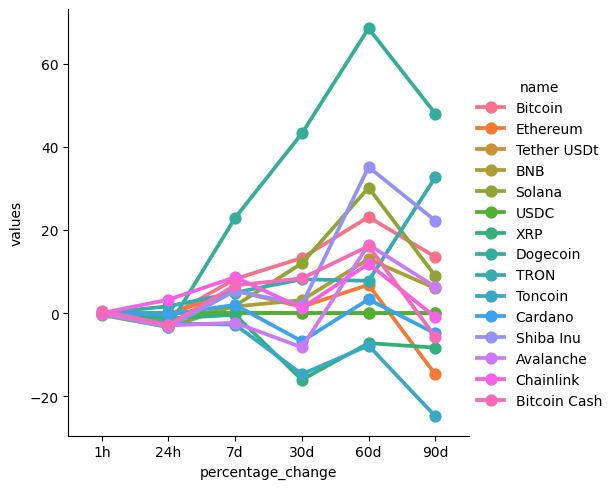

In [ ]:
import seaborn as sms
import matplotlib.pyplot as plt

sms.catplot(x='percentage_change',y='values',hue='name',data=df4,kind='point')